### Random Forest
- 랜덤한 결정 트리(Decision Tree)를 여러개 묶은 모델
- 부트스트랩 방식으로 무작위 데이터 추출해 트리를 만든다. (데이터 중복 존재, 데이터 무작위 -> 트리도 무작위로 생성됨)
- 성능이 좋고 트리의 단점인 오버피팅이 해결할 수 있다.

In [1]:
#p119
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### 결정 트리 vs 랜덤 포레스트

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [5]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train) # n_estimators= 트리의 개수

In [6]:
dt.score(X_test, y_test), rf.score(X_test, y_test)

(0.9020979020979021, 0.958041958041958)

In [7]:
dt.feature_importances_

array([0.        , 0.01671284, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71160121, 0.0080277 , 0.        ,
       0.        , 0.        , 0.01948008, 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0520085 , 0.        , 0.11373562, 0.        ,
       0.00975173, 0.03441914, 0.        , 0.        , 0.        ])

In [8]:
rf.feature_importances_

array([0.03787691, 0.01037827, 0.06054396, 0.04632052, 0.00411841,
       0.00741879, 0.04202606, 0.10668372, 0.00391004, 0.00304396,
       0.02287709, 0.00585933, 0.02123688, 0.05572844, 0.00447418,
       0.00577852, 0.00642077, 0.01170772, 0.00510491, 0.00567233,
       0.09565403, 0.01507288, 0.10651444, 0.08628657, 0.01362964,
       0.0281489 , 0.02833061, 0.13886574, 0.01064439, 0.00967201])

In [9]:
import matplotlib.pyplot as plt

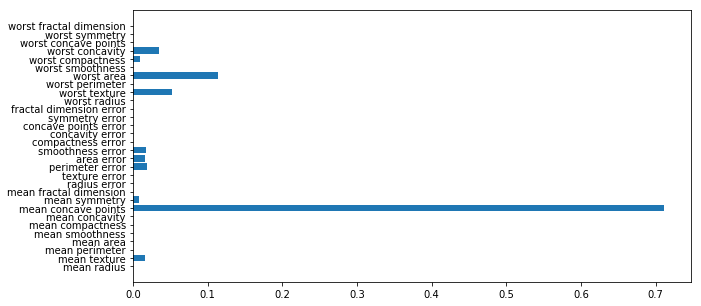

In [10]:
plt.figure(figsize=(10,5))
plt.barh(cancer.feature_names, dt.feature_importances_)
plt.show()

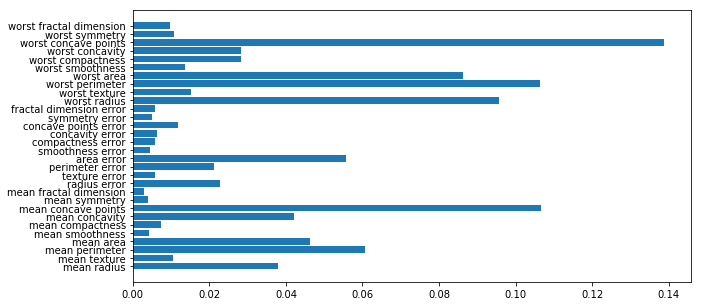

In [11]:
plt.figure(figsize=(10,5))
plt.barh(cancer.feature_names, rf.feature_importances_)
plt.show()

### 그래디언트 부스팅 회귀 트리
- 트리 앙상블 모델
- 랜덤포레스트 : 여러 트리를 서로 다른 데이터로 독립적으로 학습시킴(병렬 가능). 성능이 받쳐주는 한 최대한 많은 트리를 사용할수록 좋다.
- Gradient Boosting Decision Tree : 여러 트리를 순차적으로 학습시킴. 이때, 이전 트리의 오류를 최소화하는 방향으로 학습시킴.
    1. 보통 1 ~ 5 개의 작은 트리(depth와 leaf가 적음)를 활용 - 약한 학습기(weak learner)
    1. 파라미터 설정을 잘 해야 성능이 향상 됨.

In [12]:
# p122 보통 안정적인 랜덤 프로스트 먼저 사용. 더 성능을 높이고 싶을때 Gradient Boosting(xgboost) 사용
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [14]:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)
# train 이 1.0 이고 테스트결과가 낮아 Overfitting 상태다.

(1.0, 0.958041958041958)

In [15]:
# 과적합 > 트리를 작게 만들자 > 사전/사후 가지치기
# depth 를 줄여보자.
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.965034965034965)

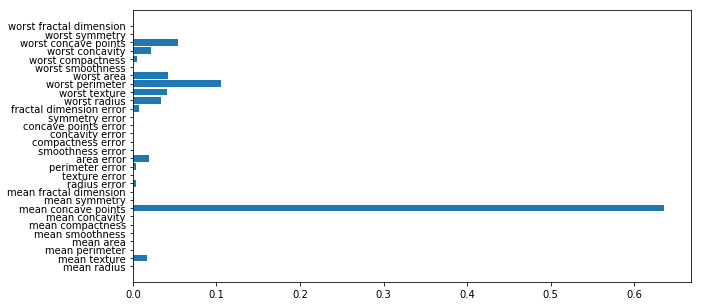

In [17]:
plt.figure(figsize=(10,5))
plt.barh(cancer.feature_names, gbrt.feature_importances_)
plt.show()

### AdaBoost (에이타부스트)
- 그래디언트 무스팅처럼 약한 학습기 사용
- 그래디언트 부스팅과 달리 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델(트리)을 훈련 시킴.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
ada = AdaBoostClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.9624413145539906, 0.9370629370629371)

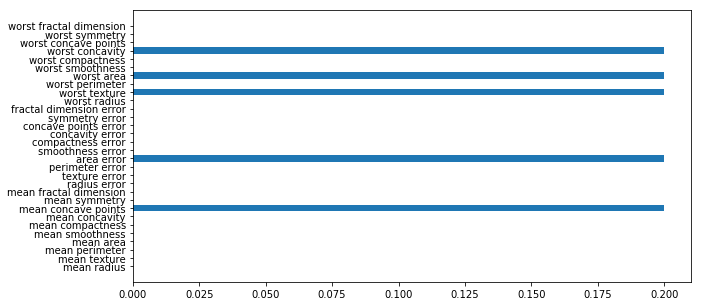

In [20]:
plt.figure(figsize=(10,5))
plt.barh(cancer.feature_names, ada.feature_importances_)
plt.show()

### 정리
- 결정 트리 --[과적합 문제]--> 앙상블 모델(램덤 포레스트, 그래디언트 부스팅 or 에이다부스트)
- 최종 결정 : 분류 작업일 경우는 투표(다수결), 예측일 때는 평균

### SVM (Support vector machine)
- p134
- p139 학습 : 일부 데이터 포인트(샘플)가 글래스 사이의 결정 경계를 구분하는데 얼마나 중용한지를 배운다.

In [21]:
from sklearn.svm import SVC
import mglearn

In [22]:
X, y = mglearn.tools.make_handcrafted_dataset()

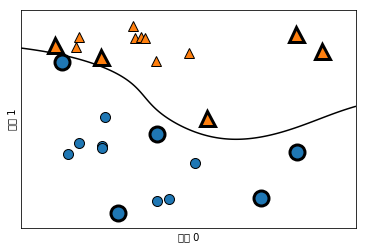

In [23]:
svc_gamma = .5 # 0~1 사이의 값, 값이 작을수록 데이터 포인트의 영향 범위가 커집니다.
svc_c = 10 # 규제(regularization) : 파라미터 값이 작아지도록 규제

svm = SVC(kernel='rbf', C=svc_c, gamma=svc_gamma).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
plt.rc('font', family='Malgun Gothic')
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [24]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train, y_train), sv.score(X_test, y_test)
# 값을 정규화하면 95% 상승, C 를 올리면 97%까지 상승 가능하나 인기는 없음

(1.0, 0.6293706293706294)

### 신경망(neural network) : 다층 퍼셉트론(multilayer perceptrons)

In [25]:
#graphviz-2.38.msi 설치
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

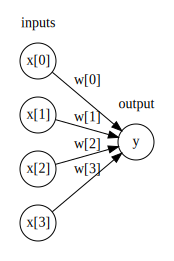

In [26]:
# 히든레이어가 없으면 Linear/Logistic regression
display(mglearn.plots.plot_logistic_regression_graph())

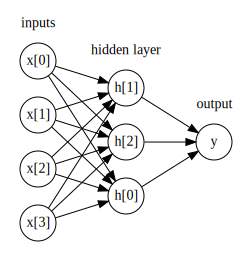

In [27]:
# Neural network : 히든레이어가 1~3개이면 신경망
display(mglearn.plots.plot_single_hidden_layer_graph())

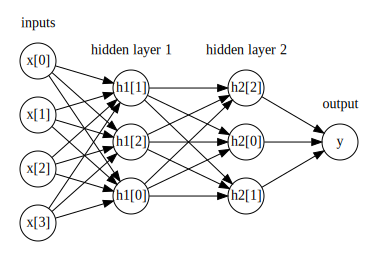

In [28]:
# 히든레이어가 10~1000까지 많아진 모델을 딥 뉴럴네트워크라고 합니다.
display(mglearn.plots.plot_two_hidden_layer_graph())

In [31]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(50,10)).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)
#장점 : 모델형태를 내 마음대로 설계, 모델형태가 최적일때의 성능은 매우 좋음.
#단점 : 어떤 모델형태가 최선인지 알기 어렵다. 학습속도가 느리다. 분석이 까다롭다.

(0.9225352112676056, 0.9370629370629371)

## 모델 정리
- KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류), Decision Tree(예측/분류(주로 사용)), Random Forest(선호), Gradient Boost, AdaBoost, SVM(분류(SVM-C)/예측(SVM-R)), MLP(Multilayer Perceptrons)